### Beer Recommendation System 
- User based recommendation
- User based prediction
- Item based recommendation
- Item based prediction
- Evaluation

In [1]:
# Importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['beer_data.csv']


#### Loading the Dataset and printing First 5 Columns

In [2]:
df= pd.read_csv('../input/beer_data.csv')
df.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


### Exploratory Data Anaysis

Printing and Renaming Columns present in Our DataFrame

In [3]:
df.columns

Index(['beer_beerid', 'review_profilename', 'review_overall'], dtype='object')

In [4]:
df.columns = ['BeerID','UserID','Ratings']
df.head()

,BeerID,UserID,Ratings
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [5]:
df.shape

(475984, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
BeerID     475984 non-null int64
UserID     475884 non-null object
Ratings    475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


#### As we can See, there are almost 100 users for which UserID is Missing. As we will be Builing Recommendation Engine for Users, We will drop Data that is corresponing to Missing UserID's as It's of No Use to Us.

In [7]:
df = df.dropna(subset=['UserID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475884 entries, 0 to 475983
Data columns (total 3 columns):
BeerID     475884 non-null int64
UserID     475884 non-null object
Ratings    475884 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


Let's Count Total Number of Users and Total Number of Reviews given on updated DataFrame

In [8]:
print('Total Number of Users: ',df.UserID.nunique())
print('Total Number of Reviews given by Users: ',df.UserID.count())

Total Number of Users:  22497
Total Number of Reviews given by Users:  475884


In [9]:
print('Total Number of Unique Beers: ',df.BeerID.nunique())

Total Number of Unique Beers:  40304


### plotting Number Reviews per Rating point Score

In [10]:
print('Total Type and Counts of Ratings:')
print(df.Ratings.value_counts())

Total Type and Counts of Ratings:
4.0    174783
4.5     97327
3.5     90785
3.0     49513
5.0     27172
2.5     17587
2.0     11606
1.5      3816
1.0      3289
0.0         6
Name: Ratings, dtype: int64


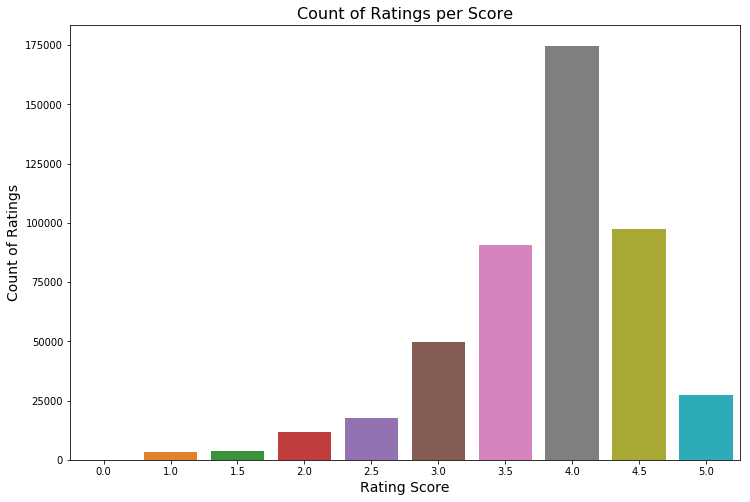

In [11]:
import seaborn as sns
# plotting number Ratings for Each Group
plt.figure(figsize=(12,8))
sns.countplot('Ratings', data = df )
plt.title('Count of Ratings per Score', fontsize=16)
plt.xlabel('Rating Score', fontsize=14)
plt.ylabel('Count of Ratings', fontsize=14)

plt.show()

### RQ.1:  Let's Decide the Threshold 'N' the Minimum Number of Ratings a beer Must Have for selecting the Beers for Analysis.

In [12]:
df_group = df.groupby('BeerID').count().sort_values(by='Ratings', ascending =False)
df_group

,UserID,Ratings
BeerID,,
2093,987,987
412,975,975
1904,904,904
1093,848,848
92,818,818
4083,808,808
276,793,793
7971,790,790
88,758,758


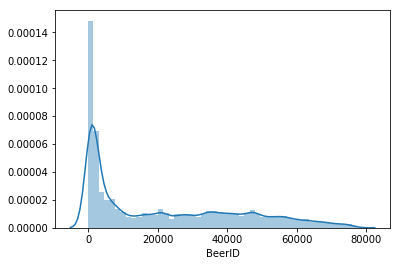

In [13]:
sns.distplot(df.BeerID)
plt.show()

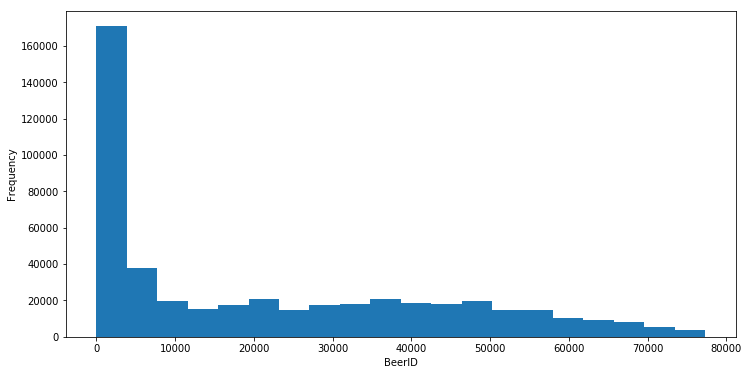

In [14]:
plt.figure(figsize = (12,6))
plt.hist(df.BeerID, bins = 20)
plt.ylabel('Frequency')
plt.xlabel('BeerID')
plt.show()

As we can see most of the data points/BeerID's review count lies between 0 and 500.<br>
Let's pick N = 500 as the minmum no of Ratings required 

In [15]:
selected_beerID_N = df_group[df_group.Ratings>400].index

Filtering DataFrame according to N = 400

In [16]:
df = df[df.BeerID.isin(selected_beerID_N)]

In [17]:
print(df.shape)
print(len(selected_beerID_N))
print(df.UserID.nunique())

(58062, 3)
106
11878


We are Left with 58,062 Reviews and 106 Unique beers

### RQ2.1: The unique values of ratings

In [18]:
print('Unique Rating Scores: ',df.Ratings.unique())

Unique Rating Scores:  [4.  3.5 4.5 3.  5.  2.5 2.  1.5 1. ]


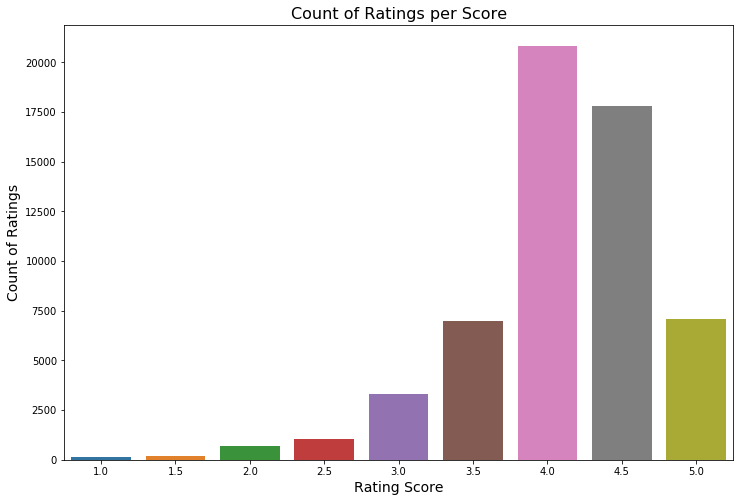

In [19]:
import seaborn as sns
# plotting number Ratings for Each Group
plt.figure(figsize=(12,8))
sns.countplot('Ratings', data = df )
plt.title('Count of Ratings per Score', fontsize=16)
plt.xlabel('Rating Score', fontsize=14)
plt.ylabel('Count of Ratings', fontsize=14)

plt.show()

### RQ2.2: Visualise the rating values and notice:


In [20]:
df_group_BeerID=df.groupby('BeerID')
df_group_UserID=df.groupby('UserID')

#### The average beer ratings:

In [21]:
Net_average_ratings = np.mean(df.Ratings)
print('Net Average Rating per User: ', Net_average_ratings )

Net Average Rating per User:  4.0911783955082495


In [22]:
average_rating_per_User = np.mean(df_group_UserID.mean().Ratings)
print('Net Average Rating per User: ', average_rating_per_User )

Net Average Rating per User:  4.117310177175599


In [23]:
average_rating_per_Beer = np.mean(df_group_BeerID.mean().Ratings)
print('Average Rating per Beer: ', average_rating_per_Beer )

Average Rating per Beer:  4.069390738981396


In [24]:
average_numbers_of_ratings_per_Beer = np.mean(df_group_BeerID.count().Ratings)
print('Average_numbers_of_ratings_per_Beer: ', average_numbers_of_ratings_per_Beer )

Average_numbers_of_ratings_per_Beer:  547.7547169811321


In [25]:
average_numbers_of_ratings_per_User = np.mean(df_group_UserID.count().Ratings)
print('Average_numbers_of_ratings_per_User: ', average_numbers_of_ratings_per_User )

Average_numbers_of_ratings_per_User:  4.888196666105405


In [26]:
aggregate_dict = {'Net Average Rating per User ': [Net_average_ratings],'Net Average Rating per User': [average_rating_per_User],
                 'Average Rating per Beer ': [average_rating_per_Beer],
                 'Average_numbers_of_ratings_per_User': [average_numbers_of_ratings_per_User]}
aggregate_dict

{'Net Average Rating per User ': [4.0911783955082495],
 'Net Average Rating per User': [4.117310177175599],
 'Average Rating per Beer ': [4.069390738981396],
 'Average_numbers_of_ratings_per_User': [4.888196666105405]}

In [27]:
df_aggregate = pd.DataFrame.from_dict(aggregate_dict, orient='index',columns=['Value'])
df_aggregate

,Value
Net Average Rating per User,4.091178
Net Average Rating per User,4.117310
Average Rating per Beer,4.069391
Average_numbers_of_ratings_per_User,4.888197


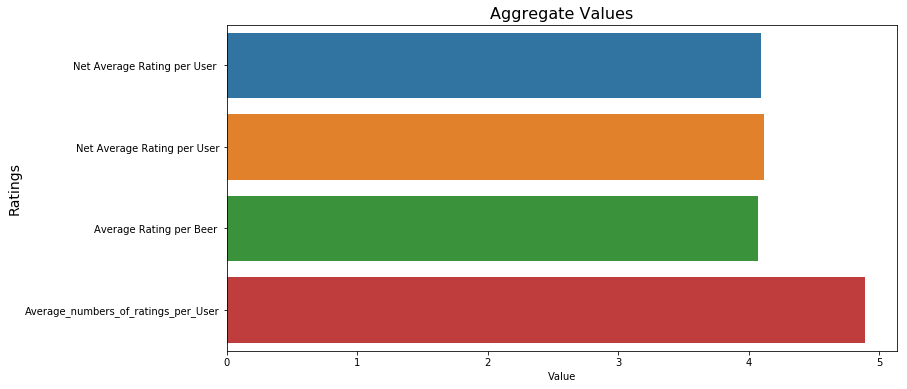

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Value',y =df_aggregate.index,  data = df_aggregate, palette='tab10' )
plt.title('Aggregate Values', fontsize=16)
plt.ylabel('Ratings', fontsize=14)
plt.show()

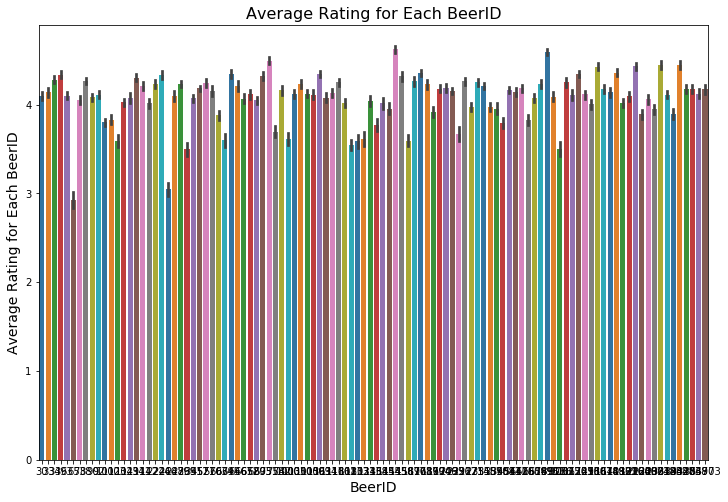

In [29]:
# Let's plot average ratings per Beer
plt.figure(figsize=(12,8))
sns.barplot('BeerID', 'Ratings', data=df, palette='tab10', estimator=lambda x : np.mean(x))
plt.title('Average Rating for Each BeerID', fontsize=16)
plt.xlabel('BeerID', fontsize=14)
plt.ylabel('Average Rating for Each BeerID', fontsize=14)
plt.show()

#### TOP 10 beers with Highest Average Ratings

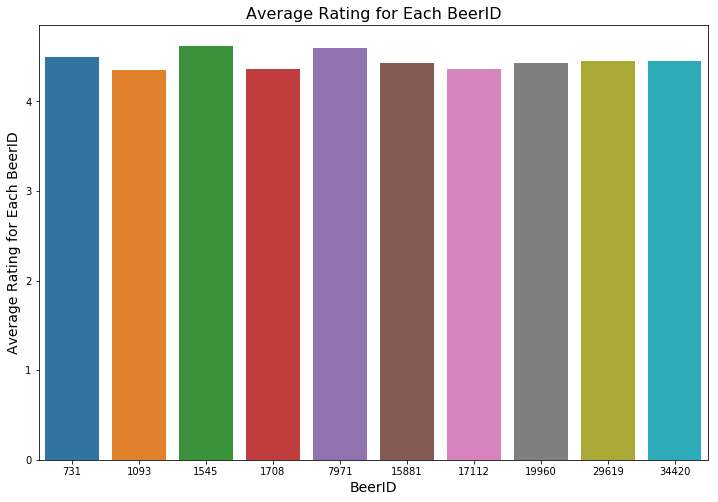

In [30]:
# Let's plot average ratings per Beer of Top 10 Highest Rated Beers
data  = df_group_BeerID.mean().sort_values(by='Ratings',ascending = False )[:10]

plt.figure(figsize=(12,8))
sns.barplot(data.index, 'Ratings', data=data, palette='tab10')
plt.title('Average Rating for Each BeerID', fontsize=16)
plt.xlabel('BeerID', fontsize=14)
plt.ylabel('Average Rating for Each BeerID', fontsize=14)
plt.show()

 **The average user ratings given by Top 10 Users**

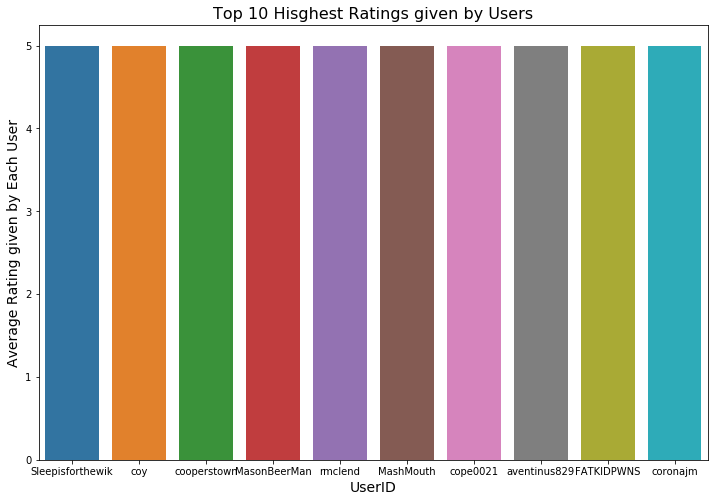

In [31]:

# Let's plot average ratings per Beer of Top 10 Highest Rating Users
data  = df_group_UserID.mean().sort_values(by='Ratings',ascending = False )[:10]

plt.figure(figsize=(12,8))
sns.barplot(data.index, 'Ratings', data=data, palette='tab10')
plt.title('Top 10 Hisghest Ratings given by Users', fontsize=16)
plt.xlabel('UserID', fontsize=14)
plt.ylabel('Average Rating given by Each User', fontsize=14)
plt.show()

**The average number of ratings given to the beers**

In [32]:
# Let's plot average ratings per Beer of Top 10 Highest Rated Beers
data  = df_group_BeerID.count().sort_values(by='Ratings',ascending = False )[:10]
data

,UserID,Ratings
BeerID,,
2093,987,987
412,975,975
1904,904,904
1093,848,848
92,818,818
4083,808,808
276,793,793
7971,790,790
88,758,758


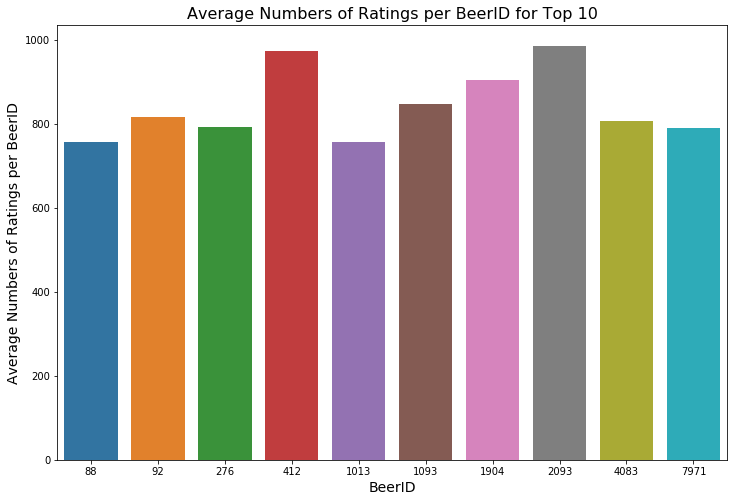

In [33]:
# Let's plot average ratings per Beer of Top 10 Highest Rated Beers
data  = df_group_BeerID.count().sort_values(by='Ratings',ascending = False )[:10]

plt.figure(figsize=(12,8))
sns.barplot(data.index, 'Ratings', data=data, palette='tab10')
plt.title('Average Numbers of Ratings per BeerID for Top 10', fontsize=16)
plt.xlabel('BeerID', fontsize=14)
plt.ylabel('Average Numbers of Ratings per BeerID', fontsize=14)
plt.show()

**The average number of ratings given by the users**

In [34]:
# Let's plot average ratings per Beer of Top 10 Highest Rated Beers
data  = df_group_UserID.count().sort_values(by='Ratings',ascending = False )[:10]
data

,BeerID,Ratings
UserID,,
BretSikkink,44,44
Cyberkedi,43,43
akorsak,42,42
Tilley4,42,42
francisweizen,40,40
atsprings,40,40
BEERchitect,39,39
mdfb79,39,39
smakawhat,39,39


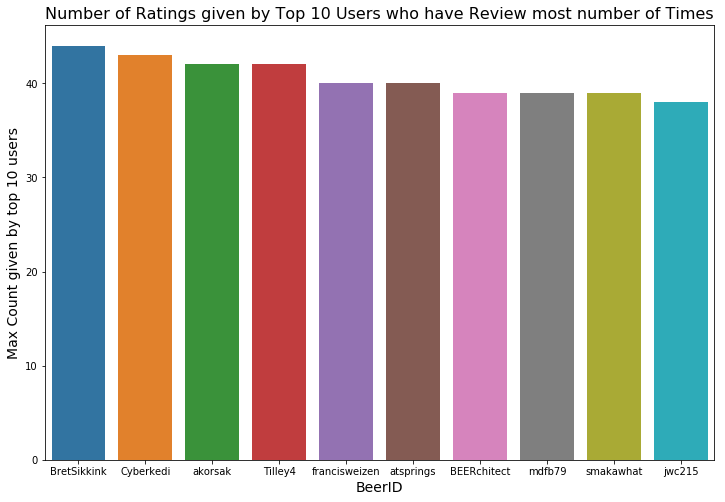

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(data.index, 'Ratings', data=data, palette='tab10')
plt.title('Number of Ratings given by Top 10 Users who have Review most number of Times', fontsize=16)
plt.xlabel('BeerID', fontsize=14)
plt.ylabel('Max Count given by top 10 users', fontsize=14)
plt.show()

### RQ.3: Recommendation Models

#### RQ.3.1: Divide your data into training and testing dataset.

In [36]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df, test_size = 0.3, random_state = 42)
print(train_df.shape, '\t\t', test_df.shape)

(40643, 3) 		 (17419, 3)


In [37]:
train_df.head()

,BeerID,UserID,Ratings
458925,680,northaustin,4.5
111596,34,Slynger,4.0
27539,276,rowew,4.0
23576,2671,kmpitz2,4.5
335873,16403,Brianmerrilyn,4.0


In [38]:
print(train_df.Ratings.value_counts())
print(test_df.Ratings.value_counts())

4.0    14578
4.5    12504
5.0     4973
3.5     4850
3.0     2328
2.5      698
2.0      443
1.5      158
1.0      111
Name: Ratings, dtype: int64
4.0    6261
4.5    5312
3.5    2109
5.0    2090
3.0     991
2.5     324
2.0     236
1.5      57
1.0      39
Name: Ratings, dtype: int64


### RQ3.2: Build user-based and item-based models.
****

## Creating copy for testing Purpose

In [39]:
dummy_train=train_df.copy()
dummy_test =test_df.copy()
dummy_train.head()

,BeerID,UserID,Ratings
458925,680,northaustin,4.5
111596,34,Slynger,4.0
27539,276,rowew,4.0
23576,2671,kmpitz2,4.5
335873,16403,Brianmerrilyn,4.0


In [40]:
dummy_test['Ratings']=dummy_test.Ratings.apply(lambda x : 1 if x >=0 else 0)
dummy_test.head()

,BeerID,UserID,Ratings
87964,102,wiseguy142,1
301824,1717,dsa7783,1
207963,731,jgagne,1
263205,88,badtzmaru,1
358032,33832,stewdawg,1


In [41]:
dummy_train['Ratings'] = dummy_train['Ratings'].apply(lambda x: 0 if x>=0 else 0)
dummy_train.head()

,BeerID,UserID,Ratings
458925,680,northaustin,0
111596,34,Slynger,0
27539,276,rowew,0
23576,2671,kmpitz2,0
335873,16403,Brianmerrilyn,0


In [42]:
dummy_train.Ratings.value_counts()

0    40643
Name: Ratings, dtype: int64

#### User-based Engine
Let's convert our Dataframe such that each Beer Represents an attribute and Ratings given to that by user represents as Value for Every User

In [43]:
def pivot_beer(df):
    df = df.pivot_table(index = 'UserID', values = 'Ratings', columns = 'BeerID')  
    return df

In [44]:
dummy_train=pivot_beer(dummy_train)
dummy_test=pivot_beer(dummy_test)
dummy_train.head()

BeerID,30,33,34,39,63,65,73,88,90,92,101,102,103,104,129,131,141,142,224,226,246,248,276,299,355,412,571,576,607,639,645,646,665,672,680,695,731,754,782,1003,...,2392,2512,2671,2751,3158,3457,3558,3951,4083,5441,6108,6260,6518,6549,7971,8951,9086,10325,10672,11757,12013,14916,15881,16074,16403,17112,18862,19216,19960,21300,22352,24071,29619,30420,33832,34420,34483,35738,38470,56973
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
dummy_train.head()

BeerID,30,33,34,39,63,65,73,88,90,92,101,102,103,104,129,131,141,142,224,226,246,248,276,299,355,412,571,576,607,639,645,646,665,672,680,695,731,754,782,1003,...,2392,2512,2671,2751,3158,3457,3558,3951,4083,5441,6108,6260,6518,6549,7971,8951,9086,10325,10672,11757,12013,14916,15881,16074,16403,17112,18862,19216,19960,21300,22352,24071,29619,30420,33832,34420,34483,35738,38470,56973
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# The Beer not rated by user is marked as 1 for prediction in Train. 
dummy_train.fillna(1, inplace = True)
print(dummy_train.head())

# The Beer rated by user is marked as 1 for Evaluation in Test. 
dummy_test.fillna(0, inplace = True)
print(dummy_test.head())

BeerID     30     33     34     39     ...    34483  35738  38470  56973
UserID                                 ...                              
0110x011     1.0    1.0    1.0    1.0  ...      1.0    1.0    0.0    1.0
05Harley     1.0    1.0    1.0    1.0  ...      1.0    1.0    1.0    1.0
0tt0         1.0    1.0    1.0    1.0  ...      1.0    1.0    1.0    1.0
100floods    1.0    1.0    1.0    1.0  ...      1.0    1.0    1.0    1.0
1099         1.0    1.0    1.0    1.0  ...      1.0    1.0    1.0    1.0

[5 rows x 106 columns]
BeerID     30     33     34     39     ...    34483  35738  38470  56973
UserID                                 ...                              
0110x011     0.0    0.0    0.0    0.0  ...      1.0    0.0    0.0    0.0
05Harley     0.0    0.0    0.0    0.0  ...      0.0    1.0    0.0    0.0
0beerguy0    0.0    0.0    0.0    0.0  ...      0.0    0.0    0.0    0.0
0tt0         0.0    0.0    0.0    0.0  ...      0.0    0.0    0.0    0.0
1099         0.0    0.0    

In [47]:
pivot_df = pivot_beer(train_df)
pivot_df.head()

BeerID,30,33,34,39,63,65,73,88,90,92,101,102,103,104,129,131,141,142,224,226,246,248,276,299,355,412,571,576,607,639,645,646,665,672,680,695,731,754,782,1003,...,2392,2512,2671,2751,3158,3457,3558,3951,4083,5441,6108,6260,6518,6549,7971,8951,9086,10325,10672,11757,12013,14916,15881,16074,16403,17112,18862,19216,19960,21300,22352,24071,29619,30420,33832,34420,34483,35738,38470,56973
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,4.0,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
train_df.shape

(40643, 3)

In [49]:
pivot_df.shape

(10190, 106)

### Normalising the rating of the BeerID for each user aroung 0 mean

In [50]:
mean = np.nanmean(pivot_df, axis = 1)
print(mean.shape)

(10190,)


In [51]:
pivot_df = (pivot_df.T-mean).T
pivot_df.head()

BeerID,30,33,34,39,63,65,73,88,90,92,101,102,103,104,129,131,141,142,224,226,246,248,276,299,355,412,571,576,607,639,645,646,665,672,680,695,731,754,782,1003,...,2392,2512,2671,2751,3158,3457,3558,3951,4083,5441,6108,6260,6518,6549,7971,8951,9086,10325,10672,11757,12013,14916,15881,16074,16403,17112,18862,19216,19960,21300,22352,24071,29619,30420,33832,34420,34483,35738,38470,56973
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.357143,-0.357143,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642857,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.214286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.214286,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.214286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.785714,NaN,-0.214286,NaN,0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.214286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,-0.2,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's create User Similarity Matrix
Using Cosine Similarities= dot_product of each row with Other rows to calculate simialarity scores between users

In [52]:
from sklearn.metrics.pairwise import pairwise_distances
user_correlation  = 1- pairwise_distances(pivot_df.fillna(0),metric = 'cosine')
user_correlation[np.isnan(user_correlation)] = 0
user_correlation.shape

(10190, 10190)

### RQ3.3: Determine how similar the first 10 users are to each other and visualise it.

In [53]:
(user_correlation[:10,:10].shape)

(10, 10)

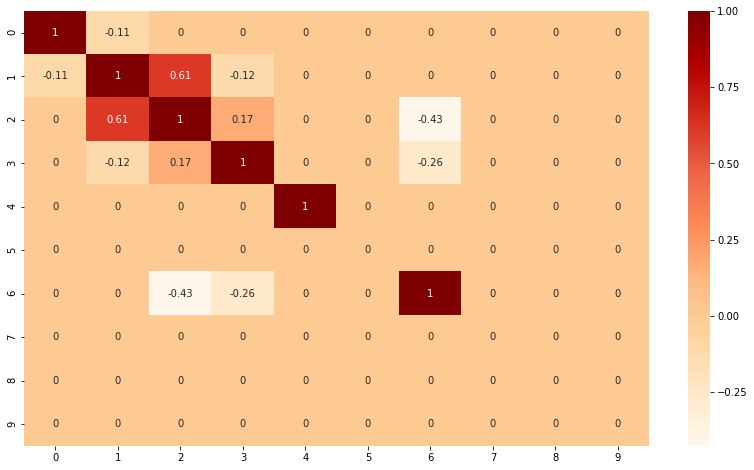

In [54]:
plt.figure(figsize=(14,8))
sns.heatmap(user_correlation[:10,:10], annot = True,cmap="OrRd")
plt.show()

> Before we use User Correlation and start Calcuting predicted ratings we have to remove user who are negatively correlated as we don't need them.
We want only users who are similar for our predicting Ratings

In [55]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.61461146, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.61461146, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Calculating Predicted Ratings of Beers by using the weighted sum of correlation with the Beer rating and User Similarity Matrix:
Now we need to calculate how much rating a user will give to BeerID that he has not Rated. For this purpose we will use a dot product on user_correlation with pivot_df, so that user's correlation with him and others will be used to calulate average user score he should have given to Beer.

In [56]:
predicted_ratings = np.dot(user_correlation,pivot_df.fillna(0) )
predicted_ratings[:5]

array([[-2.67006177e-02,  8.79929625e-01,  2.09728090e-01,
         8.27209830e-01, -1.67831590e-01, -3.79834852e+00,
         4.62214473e-01,  1.17771956e+00, -5.26943141e-01,
         6.64277524e-01, -1.30268196e+00, -1.22554060e+00,
        -2.12186121e+00, -1.14791754e-01, -2.90064278e-01,
         1.79918008e+00, -3.97388317e-01, -1.34343627e+00,
         2.67096636e-01,  1.17279091e+00, -2.52891070e+00,
        -3.85162040e-01,  3.85720026e-01, -1.50860055e+00,
         3.91212378e-01,  6.00396653e-01,  6.56107814e-01,
        -3.36779660e-01, -1.51539788e+00, -1.36721369e+00,
         8.03684410e-01, -1.67015423e-01, -1.58384769e-01,
        -1.32808700e-01, -8.54837930e-01,  1.20676259e+00,
         2.19997774e+00, -1.36912613e+00,  4.78216326e-01,
        -1.41269599e+00,  2.75331321e-02,  8.12350858e-01,
         1.04783257e-01, -6.34567303e-01, -5.49518371e+00,
        -4.38265535e-01, -9.22577831e-02,  1.43039178e+00,
        -1.29837173e+00, -2.01746631e+00, -1.60072347e+0

In [57]:
predicted_ratings.shape

(10190, 106)

#### Beer Recommendation Scores based on User Similarity

In [58]:
user_based_final_rating = np.multiply(predicted_ratings,dummy_train)
user_based_final_rating.head()

BeerID,30,33,34,39,63,65,73,88,90,92,101,102,103,104,129,131,141,142,224,226,246,248,276,299,355,412,571,576,607,639,645,646,665,672,680,695,731,754,782,1003,...,2392,2512,2671,2751,3158,3457,3558,3951,4083,5441,6108,6260,6518,6549,7971,8951,9086,10325,10672,11757,12013,14916,15881,16074,16403,17112,18862,19216,19960,21300,22352,24071,29619,30420,33832,34420,34483,35738,38470,56973
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,-0.026701,0.879930,0.209728,0.827210,-0.167832,-3.798349,0.462214,1.177720,-0.526943,0.664278,-1.302682,-1.225541,-2.121861,-0.114792,-0.290064,1.799180,-0.397388,-1.343436,0.267097,1.172791,-2.528911,-0.385162,0.385720,-1.508601,0.391212,0.600397,0.656108,-0.336780,-1.515398,-1.367214,0.803684,-0.167015,-0.158385,-0.132809,-0.854838,1.206763,2.199978,-1.369126,0.478216,-1.412696,...,-2.309501,0.796097,-1.510461,1.072494,0.252176,-0.773804,-0.820152,-0.521000,0.796136,-0.556417,0.441655,-2.019686,-0.223157,1.227455,4.526754,-0.601776,-2.467455,-0.000000,-0.000000,0.000000,0.095709,-0.496347,2.295990,-0.109409,-0.408969,1.853515,-0.517629,-0.306757,2.660922,-0.969685,-0.330403,-0.683645,3.241398,-0.102883,-0.740659,2.428040,0.151710,0.243110,0.000000,0.177291
05Harley,-0.307199,0.820392,1.538672,2.286660,-0.315246,-5.292109,0.635261,2.474731,-0.048425,1.009879,-1.290244,-2.737720,-3.445249,-0.315306,0.200376,-0.000000,1.308264,0.086920,1.761028,0.896076,-5.254995,0.157027,1.033929,-3.635784,-0.514154,-0.105461,1.260060,0.073980,-2.328585,-2.247629,3.600082,0.064095,-0.862371,0.087204,-3.208079,-0.000000,3.168847,-3.126984,0.123163,-4.026904,...,-4.236589,0.733349,-0.000000,0.143441,0.604051,-2.203913,0.139530,-2.178552,0.013226,0.376783,1.254734,-4.643339,0.410285,-0.039629,0.000000,-0.082205,-0.000000,1.131824,0.000000,3.776550,-0.497940,-1.302649,3.043583,-0.699254,-1.568368,3.360011,-1.250823,-0.000000,4.029205,-0.397478,-2.678726,-1.995094,3.533450,-0.348355,-4.467600,3.402380,0.328734,0.217613,1.542797,0.308808
0tt0,-0.756337,0.462460,1.602065,1.570593,-0.425164,-4.336687,0.081545,1.858214,-0.268407,-0.696918,-1.178738,-3.426108,-2.917909,-0.689440,-0.325702,2.426492,1.286191,0.200014,1.600366,0.674932,-4.678493,0.253931,0.573917,-2.282872,-0.794829,-0.000000,0.971028,-0.071792,-2.233321,-1.878376,2.554123,-0.137563,-0.306530,-0.028527,-3.416817,0.061697,2.886134,-2.449640,0.762588,-3.671552,...,-4.129496,0.366919,-2.099997,0.685155,0.742381,-2.215583,-0.176430,-1.437082,-0.347492,-0.231306,1.614813,-3.937660,-0.359240,-0.502909,0.000000,-0.966851,-5.370840,0.383964,-1.078903,2.301479,-0.423065,-0.921525,2.522515,0.309581,-0.000000,2.092226,-1.243689,-1.031003,3.329273,-0.158488,-2.005351,-1.697875,2.609419,-0.424242,-3.351989,1.937333,0.424434,0.722394,1.179125,-0.273101
100floods,-0.099028,0.357864,1.115966,0.618377,0.664544,-3.790801,-0.238536,0.897943,0.217170,1.359161,-0.640277,-1.412466,-2.457922,-0.356548,-0.342604,1.378888,0.220577,-0.011673,0.648372,0.654136,-2.184288,0.084082,1.077208,-1.863600,-0.069636,-0.000000,0.842948,0.078063,-0.405894,-2.669112,1.331064,0.244750,-0.006782,0.017585,-0.109108,0.708789,2.313848,-1.420560,0.678718,-1.659007,...,-1.571963,1.430482,0.000000,0.909990,0.594185,-0.198507,-0.220306,-0.922693,0.084347,-0.009082,1.817773,-0.598550,-0.213787,0.219733,2.867552,-0.353871,-1.809504,0.823739,-0.098342,1.237327,0.151011,-0.297951,1.296475,0.365725,-0.231661,2.112354,-0.231713,-0.118462,1.921597,-0.253792,0.011872,-1.185344,1.233596,0.000000,-0.418672,-0.000000,0.600213,0.956574,0.417767,0.601794
1099,0.930161,0.285040,3.141006,1.813019,0.778418,-0.000000,-0.000000,1.853336,0.849312,3.108982,-2.200906,-2.514509,-1.471363,0.747657,0.964803,3.003056,2.407196,0.119531,1.557923,1.458932,-6.316432,0.630356,4.711033,-2.099221,2.471294,1.505659,0.000000,1.479638,0.122799,-3.589476,2.550993,0.785727,0.288226,1.030481,-1.135838,3.130321,4.495562,-1.890717,2.085154,-0.610724,...,-1.419679,1.395601,-1.106876,1.423527,1.556322,-0.

### Printing Top 5 Beers for 1st User based on Recommendation Score

In [60]:
user_based_final_rating.iloc[0].sort_values(ascending=False)[0:10]

BeerID
7971     4.526754
29619    3.241398
19960    2.660922
34420    2.428040
15881    2.295990
731      2.199978
17112    1.853515
131      1.799180
1708     1.631900
1160     1.430392
Name: 0110x011, dtype: float64

### RQ3.3: Items Based:
**Compute and visualise the similarity between the first 10 beers.**

Taking the transpose of the rating matrix to normalize the rating around the mean for different BeerID. In the user based similarity, we had taken mean for each user intead of each BeerID. 

In [61]:
item_df=pivot_beer(train_df).T
item_df.head()

UserID,0110x011,05Harley,0tt0,100floods,1099,11millsown113,11osixBrew,1229design,12percent,12vUnion,1759Girl,18alpha,1Adam12,1fastz28,1morebeer,1noa,1santore,1whiskey,20ozmonkey,220emaple,22ozStone,2378GCGTG,23fyerfyter,245Trioxin,24Beer92,2DaMtns,2KHokie,2LBrew,2Stout4u,2ndstage,2wheeledpirate,2xHops,32hoss32,33nickadams,3HovsepiansBrews,3Vandoo,3leggeddub,4000qtrap,49degrees,4DAloveofSTOUT,...,zappafan99,zappuh,zaq37,zbones,zbs,zbuc919,zdk9,zdyeates,zebco,zeff80,zeledonia,zerk,zerofear13,zfjohnson,zhanson88,zhooker,zic,ziggy13,zimm421,zimmerbloke,zjungleist,znichols,zodiak3000,zoolzoo,zorro5683,zoso1967,zoso493,zplug123,zrab11,zseeanz,ztaylor1,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
BeerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the rating for each BeerID

In [62]:
mean = np.nanmean(item_df, axis=1)
norm_BeerID = (item_df.T-mean).T
norm_BeerID.head()

UserID,0110x011,05Harley,0tt0,100floods,1099,11millsown113,11osixBrew,1229design,12percent,12vUnion,1759Girl,18alpha,1Adam12,1fastz28,1morebeer,1noa,1santore,1whiskey,20ozmonkey,220emaple,22ozStone,2378GCGTG,23fyerfyter,245Trioxin,24Beer92,2DaMtns,2KHokie,2LBrew,2Stout4u,2ndstage,2wheeledpirate,2xHops,32hoss32,33nickadams,3HovsepiansBrews,3Vandoo,3leggeddub,4000qtrap,49degrees,4DAloveofSTOUT,...,zappafan99,zappuh,zaq37,zbones,zbs,zbuc919,zdk9,zdyeates,zebco,zeff80,zeledonia,zerk,zerofear13,zfjohnson,zhanson88,zhooker,zic,ziggy13,zimm421,zimmerbloke,zjungleist,znichols,zodiak3000,zoolzoo,zorro5683,zoso1967,zoso493,zplug123,zrab11,zseeanz,ztaylor1,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
BeerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.885915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.114085,NaN,NaN,NaN,NaN,-0.114085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.614085,-0.114085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.844249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400266,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(norm_BeerID.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.03003791  0.0348847  ... -0.00183308  0.00484418
   0.02010736]
 [ 0.03003791  1.          0.00985804 ... -0.0162668   0.01390811
  -0.00115357]
 [ 0.0348847   0.00985804  1.         ... -0.01723924 -0.00369495
   0.00891789]
 ...
 [-0.00183308 -0.0162668  -0.01723924 ...  1.          0.00271428
   0.01377878]
 [ 0.00484418  0.01390811 -0.00369495 ...  0.00271428  1.
  -0.00428309]
 [ 0.02010736 -0.00115357  0.00891789 ...  0.01377878 -0.00428309
   1.        ]]


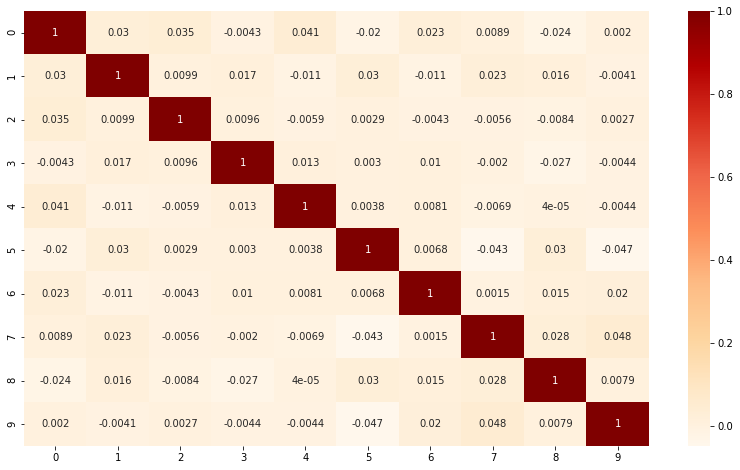

In [64]:
plt.figure(figsize=(14,8))
sns.heatmap(item_correlation[:10,:10], annot = True,cmap="OrRd")
plt.show()

In [65]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.03003791, 0.0348847 , ..., 0.        , 0.00484418,
        0.02010736],
       [0.03003791, 1.        , 0.00985804, ..., 0.        , 0.01390811,
        0.        ],
       [0.0348847 , 0.00985804, 1.        , ..., 0.        , 0.        ,
        0.00891789],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.00271428,
        0.01377878],
       [0.00484418, 0.01390811, 0.        , ..., 0.00271428, 1.        ,
        0.        ],
       [0.02010736, 0.        , 0.00891789, ..., 0.01377878, 0.        ,
        1.        ]])

In [66]:
item_predicted_ratings = (np.dot(item_correlation, pivot_df.fillna(0).T)).T
item_based_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_based_final_rating.head()

BeerID,30,33,34,39,63,65,73,88,90,92,101,102,103,104,129,131,141,142,224,226,246,248,276,299,355,412,571,576,607,639,645,646,665,672,680,695,731,754,782,1003,...,2392,2512,2671,2751,3158,3457,3558,3951,4083,5441,6108,6260,6518,6549,7971,8951,9086,10325,10672,11757,12013,14916,15881,16074,16403,17112,18862,19216,19960,21300,22352,24071,29619,30420,33832,34420,34483,35738,38470,56973
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,0.008680,0.003765,-0.005496,-0.013842,-0.013050,0.007959,0.015894,0.000299,-0.005898,-0.011591,0.003773,-0.011912,-0.000671,-0.001534,-0.005583,0.002818,-0.025404,-0.024733,0.001705,0.002266,-0.004161,-0.002066,-0.012594,0.000871,-0.002473,-0.011803,0.004611,-0.005698,-0.011792,0.000314,-0.025282,-0.015356,0.006180,0.022294,-0.007279,-0.012562,-0.004301,0.003908,-0.000026,-0.010286,...,-0.002297,0.001646,-0.015153,-0.004253,0.002055,-0.004117,0.000011,-0.003044,0.001738,-0.019183,0.000980,-0.000739,-0.006902,0.013984,0.010220,-0.015365,0.005305,-0.000000,-0.000000,0.000000,-0.003052,-0.011662,0.006439,-0.009191,-0.008814,-0.000976,-0.010819,-0.009072,0.032746,-0.000379,-0.003315,-0.003859,-0.004268,-0.008155,-0.005704,0.011191,0.010527,-0.007199,0.000000,-0.010842
05Harley,-0.022008,0.032900,-0.009124,0.000294,0.005672,-0.000584,0.010100,0.000850,0.009471,-0.005678,-0.006051,0.000019,0.009528,0.002511,0.016179,-0.000000,-0.009460,-0.006214,0.011105,-0.009364,-0.003187,0.013170,-0.007940,-0.008588,-0.008644,-0.009850,0.003760,0.009293,-0.012953,0.005214,0.014093,-0.015316,-0.006491,0.002139,-0.010664,-0.000000,-0.004932,-0.012510,-0.005532,-0.012340,...,-0.010918,0.000404,-0.000000,0.011408,-0.009575,-0.005169,0.005521,0.016301,0.008179,0.000849,0.002610,-0.011305,0.004104,-0.001966,0.000000,-0.001299,-0.000000,-0.009772,0.000000,0.013229,-0.002304,0.017679,-0.001777,-0.012488,-0.020597,-0.002478,-0.005859,-0.000000,-0.001154,-0.004906,-0.008814,-0.007092,0.006648,0.001780,-0.002902,0.001562,-0.001980,-0.002309,0.000968,-0.006818
0tt0,-0.014492,0.026238,0.000206,-0.006986,0.003307,-0.006909,0.004899,-0.005467,0.005533,-0.013292,-0.001949,-0.003645,0.004561,0.007473,0.003632,-0.008951,0.001163,0.000143,0.010972,-0.014535,0.005147,0.013213,-0.004294,0.003672,-0.009068,-0.000000,0.007745,0.009926,-0.004636,-0.005618,-0.006764,-0.003584,-0.000164,0.005078,0.001031,-0.005046,-0.007467,-0.006577,0.006806,-0.003946,...,-0.010917,0.011985,0.003673,0.020025,0.004470,-0.010249,0.007202,0.006833,0.004992,-0.006790,0.001583,-0.005644,-0.018826,-0.014542,0.000000,-0.015994,0.010136,-0.015512,-0.000633,0.005944,-0.003573,0.010078,0.009405,0.003737,-0.000000,-0.009236,-0.015232,-0.001617,0.009178,0.008874,0.000044,-0.005131,0.009060,-0.012586,-0.000088,-0.004194,0.001781,0.005356,0.005103,0.001676
100floods,-0.008236,-0.004351,0.000786,0.002839,-0.003671,-0.007537,-0.001000,0.009820,-0.000239,0.006372,-0.002809,0.006128,-0.000958,0.008407,-0.000363,-0.003995,-0.003338,0.003404,-0.007021,-0.006522,0.007177,0.000666,0.003094,0.000826,0.005275,-0.000000,0.011746,0.007191,0.006257,-0.007389,0.004982,0.022404,-0.001445,0.000000,0.004697,-0.000372,-0.004162,-0.001150,-0.003263,0.003816,...,-0.008692,0.002435,0.000000,0.003970,-0.006107,-0.004829,-0.000844,-0.000194,0.003474,-0.003067,0.007450,-0.004003,-0.003545,-0.003151,0.008609,0.014297,0.001774,-0.006932,0.008049,-0.014256,-0.006285,0.002915,-0.000710,-0.000257,0.014424,0.000121,0.000193,-0.009251,0.015866,0.010752,0.001535,0.006330,0.000664,0.000000,-0.002507,-0.000000,0.000364,0.008408,0.002380,0.006799
1099,-0.004188,-0.015199,-0.001191,-0.003485,-0.005975,-0.000000,-0.000000,0.006631,-0.007279,-0.010074,0.005144,-0.014545,-0.000922,0.004045,0.000000,0.003472,-0.014889,0.018639,0.000000,0.020636,-0.007332,-0.020168,0.000000,0.016642,0.004596,-0.022820,0.000000,0.015796,-0.018877,-0.015736,-0.002514,-0.000519,-0.007797,-0.008240,-0.017424,0.006660,-0.000557,0.008639,0.009638,-0.000410,...,0.000000,-0.002557,0.017097,-0.

In [70]:
item_based_final_rating.shape

(10190, 106)

#### Top 5 prediction for the user -1

In [72]:
item_based_final_rating.iloc[1].sort_values(ascending=False)[0:5]

BeerID
33       0.032900
14916    0.017679
1558     0.017040
3951     0.016301
129      0.016179
Name: 05Harley, dtype: float64

In [73]:
top_10_item = item_based_final_rating.iloc[:10,:10]
top_10_item

BeerID,30,33,34,39,63,65,73,88,90,92
UserID,,,,,,,,,,
0110x011,0.008680,0.003765,-0.005496,-0.013842,-0.013050,0.007959,0.015894,0.000299,-0.005898,-0.011591
05Harley,-0.022008,0.032900,-0.009124,0.000294,0.005672,-0.000584,0.010100,0.000850,0.009471,-0.005678
0tt0,-0.014492,0.026238,0.000206,-0.006986,0.003307,-0.006909,0.004899,-0.005467,0.005533,-0.013292
100floods,-0.008236,-0.004351,0.000786,0.002839,-0.003671,-0.007537,-0.001000,0.009820,-0.000239,0.006372
1099,-0.004188,-0.015199,-0.001191,-0.003485,-0.005975,-0.000000,-0.000000,0.006631,-0.007279,-0.010074
11millsown113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11osixBrew,0.000193,-0.002083,-0.002303,-0.004305,-0.000001,0.005922,0.005488,-0.001949,0.002611,0.002894
1229design,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12percent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
predicted_ratings.shape

(10190, 106)

In [75]:
item_based_final_rating.iloc[1].sort_values(ascending =False)[:10]

BeerID
33       0.032900
14916    0.017679
1558     0.017040
3951     0.016301
129      0.016179
645      0.014093
11757    0.013229
248      0.013170
2751     0.011408
224      0.011105
Name: 05Harley, dtype: float64

### RQ3.6: Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [76]:
user_based_final_rating.loc['cokes'].sort_values(ascending = False)[:5]

BeerID
7971     5.910699
731      4.910593
1093     4.381302
11757    3.421160
1708     3.233993
Name: cokes, dtype: float64

In [77]:
item_based_final_rating.loc['cokes'].sort_values(ascending = False)[:5]

BeerID
142     0.129397
92      0.065286
1717    0.059309
6260    0.055122
4083    0.051358
Name: cokes, dtype: float64

In [78]:
user_based_final_rating.loc['genog'].sort_values(ascending = False)[:5]

BeerID
1093     4.827868
7971     4.626793
645      3.246385
15881    2.884342
1160     2.734729
Name: genog, dtype: float64

In [79]:
item_based_final_rating.loc['genog'].sort_values(ascending = False)[:5]

BeerID
16074    0.040972
1558     0.023072
1587     0.021151
412      0.021089
92       0.020282
Name: genog, dtype: float64

In [80]:
user_based_final_rating.loc['giblet'].sort_values(ascending = False)[:5]

BeerID
7971    5.594755
731     5.524075
1093    5.452101
34      4.353497
1708    3.876993
Name: giblet, dtype: float64

In [81]:
item_based_final_rating.loc['giblet'].sort_values(ascending = False)[:5]

BeerID
142      0.085337
6549     0.056222
3158     0.047605
16403    0.047397
6518     0.041998
Name: giblet, dtype: float64

### RQ3.5: Compare the performance of the two models using test data and suggest the one that should be deployed.

We will evaluate for the BeerID already rated by the user insead of predicting it for the beerID not rated by the user.

In [82]:
test_beer_features = test_df.pivot_table(
    index='UserID',
    columns='BeerID',
    values='Ratings'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [83]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[ 0.68836473,  6.94665473,  5.92085711, ..., 10.17515863,
        10.81101801,  9.61105042],
       [10.65618402,  5.16478348,  6.15641719, ..., 87.36639672,
         7.66603181,  7.51395448],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [84]:
test_user_predicted_ratings.shape

(6954, 106)

In [85]:
dummy_test.shape

(6954, 106)

In [86]:
test_user_final_rating = np.multiply(test_user_predicted_ratings, dummy_test)
test_user_final_rating.head()

BeerID,30,33,34,39,63,65,73,88,90,92,101,102,103,104,129,131,141,142,224,226,246,248,276,299,355,412,571,576,607,639,645,646,665,672,680,695,731,754,782,1003,...,2392,2512,2671,2751,3158,3457,3558,3951,4083,5441,6108,6260,6518,6549,7971,8951,9086,10325,10672,11757,12013,14916,15881,16074,16403,17112,18862,19216,19960,21300,22352,24071,29619,30420,33832,34420,34483,35738,38470,56973
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.559577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.264424,0.000000,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,87.366397,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


### Calculating the RMSE for only the BeerID rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [87]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]
X = pd.DataFrame(X).fillna(0)
# X = np.nan_to_num(X)

scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)
y = (scaler.transform(X))

print(y)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 4.71210752 1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [88]:
test_d = test_df.pivot_table(
    index='UserID',
    columns='BeerID',
    values='Ratings'
)

In [89]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

737124

In [90]:
test_d.shape

(6954, 106)

In [91]:
rmse_user_based = (sum(sum((test_d - y )**2))/total_non_nan)**0.5
print(rmse_user_based)

0.33845416935770933


### Using Item similarity for Evaluation

In [92]:
test_beer_features = test_df.pivot_table(
    index='UserID',
    columns='BeerID',
    values='Ratings'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [93]:
test_item_correlation.shape

(106, 106)

In [94]:
test_beer_features.shape

(106, 6954)

In [95]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

BeerID,30,33,34,39,63,65,73,88,90,92,101,102,103,104,129,131,141,142,224,226,246,248,276,299,355,412,571,576,607,639,645,646,665,672,680,695,731,754,782,1003,...,2392,2512,2671,2751,3158,3457,3558,3951,4083,5441,6108,6260,6518,6549,7971,8951,9086,10325,10672,11757,12013,14916,15881,16074,16403,17112,18862,19216,19960,21300,22352,24071,29619,30420,33832,34420,34483,35738,38470,56973
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]
X = np.nan_to_num(X)

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_d = test_df.pivot_table(
    index='UserID',
    columns='BeerID',
    values='Ratings'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


In [97]:
rmse_item_based = (sum(sum((test_d - y )**2))/total_non_nan)**0.5
print(rmse_item_based)

0.0412443574844779


### Printing RMSE for both User_based as well Item_based Collaborative Engine

In [98]:
print('rmse_item_based: ',rmse_item_based)
print('rmse_user_based: ',rmse_user_based)

rmse_item_based:  0.0412443574844779
rmse_user_based:  0.33845416935770933


### RQ3.5: As We can see, The RMSE for Item based Recommendation Score is lower compared to the Item based Recommendation Engine, So we will go with Item**** Based Recommendation Engine as preference